# Lunch and (M)Learn

Below are our imports:
 - loading our dataset I'll use pandas
 - numpy for matrix manipulation
 - matplotlib and seaborn for visualization 
 - sklearn for building our classifier models

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn import datasets

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import warnings

In [2]:
#preloaded dataset
iris = datasets.load_iris()

In [3]:
# load through url
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
dataset = pd.read_csv(url, names = attributes)
dataset.columns = attributes

In [4]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
x = iris.data
y = iris.target

### Train-Test Split

1. x_train - training features
2. x_test - testing features
3. y_train - training labels
4. y_test - testing labels

rule of thumb for train/test sizes: the larger your dataset, the smaller your test_size should be. If you had 20 million values, setting your test_size to 50% is overkill

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size = .5)

#### Build Classifiers

#### What is a Decision Tree? (great question!)

Like the name alludes to, it's a model of decisions using branches and leaves. Below is a theoretical example of how we could determine female vs male based off a few questions.

         male or female based off simple parameters
         /                  \
      height<5'10"?          height>5'10"?
      /          \             /         \
    long hair  short hair   long hair   short hair
      /     \        \
    Yes?    No?
               \

In [7]:
from sklearn import tree
classifier=tree.DecisionTreeClassifier()

In [8]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [9]:
predictions=classifier.predict(x_test)

In [10]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.9466666666666667


In [11]:
fn = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
cn = ['setosa', 'versicolor', 'virginica']

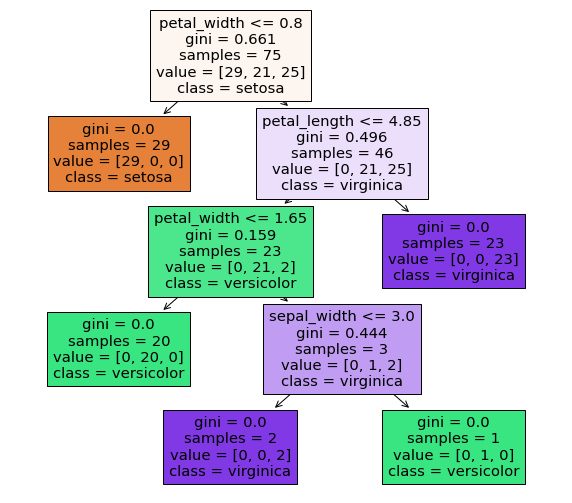

In [12]:
plt.figure(figsize = (10,9))
plot_tree(classifier, feature_names=fn, class_names=cn, filled = True);

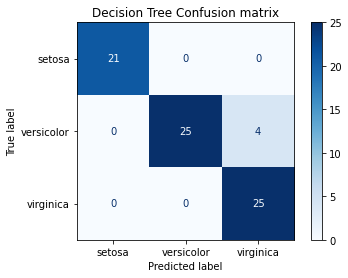

In [13]:
disp = metrics.plot_confusion_matrix(classifier, x_test, y_test,
                                 display_labels=cn,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Decision Tree Confusion matrix');